# Tabular Feasibility

For Wednesday June 25 you should be well on your way to assess feasibility of your project. This notebook will be submitted Friday June 27. You can find example codes in [Kaggle Lecture](https://github.com/UTA-DataScience/DATA3402.Spring.2025/blob/main/Lectures/Lecture.19/Lecture.19.ipynb) from Data 3402. You can find the recordings of a walk-through in our class Team (`Data 4380- 2024/Lecture Recordings`), Lectures 8 and 10-12.

## Define Project

### **Project Link:** https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

### **Project Challenge:**
The goal of this project is to build a machine learning model that can accurately classify whether an airline passenger is satisfied or neutral/dissatisfied based on their flight experience. Understanding satisfaction drivers is crucial for airline companies aiming to improve service quality and customer retention.

### **Dataset Description:** 
The dataset contains approximately 104,000 rows and 25 columns. It includes:

- 4 numerical variables (e.g., Age, Flight Distance),

- 5 categorical variables (e.g., Gender, Class, Customer Type),

- 16 service-related rating variables scored on a 0 to 5 scale (e.g., In-flight Wi-Fi service, Food and Drink, Seat Comfort).

### **Type of Machine Learning:**
This is a Supervised Binary Classification problem, where the model is trained to predict one of two outcomes: satisfied or neutral/dissatisfied.


## Data Loading and Initial Look

First lets establish that the data is in good shape:

* Load the data. 
* Count the number of rows (data points) and features.
* Any missing values? 
* Make a table, where each row is a feature or collection of features:
    * Is the feature categorical or numerical
    * What values? 
        * e.g. for categorical: "0,1,2"
        * e.g. for numerical specify the range
    * How many missing values
    * Do you see any outliers?
        * Define outlier.
    * If you have a lot of features, summarize (e.g. 100 categorical and 500 numerical features).
* For classification is there class imbalance?
* What is the target:
    * Classification: how is the target encoded (e.g. 0 and 1)?
    * Regression: what is the range?

In [1]:
# Load the data
import numpy as np
import pandas as pd

train = pd.read_csv('airline_data/train.csv')
test = pd.read_csv('airline_data/test.csv')

In [2]:
# Read train dataset
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
# Count the number of rows and features
print(train.shape)

(103904, 25)


In [4]:
# Train Dataset Description
train.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [5]:
# Features Summary

features_summary = []
duplicated_values = train.duplicated().sum()

for column in train.columns:
  if train[column].dtype == 'object':
    feature_type = 'Categorical'
    values = train[column].unique()

  else:
    feature_type = 'Numerical'
    values = f"{train[column].min()} to {train[column].max()}"

  missing_values = train[column].isnull().sum()
  features_summary.append([column, feature_type, values, missing_values])

features_table = pd.DataFrame(features_summary, columns=['Feature', 'Type', 'Values', 'Missing Values'])

print(features_table)
print("Duplicated Values:", duplicated_values)

                              Feature         Type  \
0                          Unnamed: 0    Numerical   
1                                  id    Numerical   
2                              Gender  Categorical   
3                       Customer Type  Categorical   
4                                 Age    Numerical   
5                      Type of Travel  Categorical   
6                               Class  Categorical   
7                     Flight Distance    Numerical   
8               Inflight wifi service    Numerical   
9   Departure/Arrival time convenient    Numerical   
10             Ease of Online booking    Numerical   
11                      Gate location    Numerical   
12                     Food and drink    Numerical   
13                    Online boarding    Numerical   
14                       Seat comfort    Numerical   
15             Inflight entertainment    Numerical   
16                   On-board service    Numerical   
17                   Leg roo

In [6]:
# Detecting Outliers (only numerical variables)

outliers_summary = []
numerical_columns = ['Age', 'Flight Distance','Arrival Delay in Minutes', 'Departure Delay in Minutes']
for column in numerical_columns:
  if column in train.columns:
    Q1 = train[column].quantile(0.25)
    Q3 = train[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((train[column] < lower_bound) | (train[column] > upper_bound)).sum()
    outliers_summary.append([column, outliers])

outliers_table = pd.DataFrame(outliers_summary, columns=['Feature', 'Outliers Count'])
print(outliers_table)

                      Feature  Outliers Count
0                         Age               0
1             Flight Distance            2291
2    Arrival Delay in Minutes           13954
3  Departure Delay in Minutes           14529


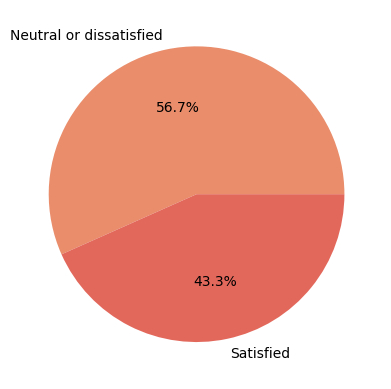

In [7]:
# Check for class imbalance
import matplotlib.pyplot as plt
import seaborn as sns

train['satisfaction'].value_counts()

plt.pie(train['satisfaction'].value_counts(),
        labels = ["Neutral or dissatisfied", "Satisfied"],
        colors = sns.color_palette("flare"),
        autopct = '%1.1f%%')
plt.show()

## Data Visualization

Next perform your first visualizaion:

* For classification: compare histogram every feature between the classes. Lots of examples of this in class.
* For regression: 
    * Define 2 or more class based on value of the regression target.
        * For example: if regression target is between 0 and 1:
            * 0.0-0.25: Class 1
            * 0.25-0.5: Class 2
            * 0.5-0.75: Class 3
            * 0.75-1.0: Class 4
    * Compare histograms of the features between the classes.
        
* Note that for categorical features, often times the information in the histogram could be better presented in a table.    
* Make comments on what features look most promising for ML task.

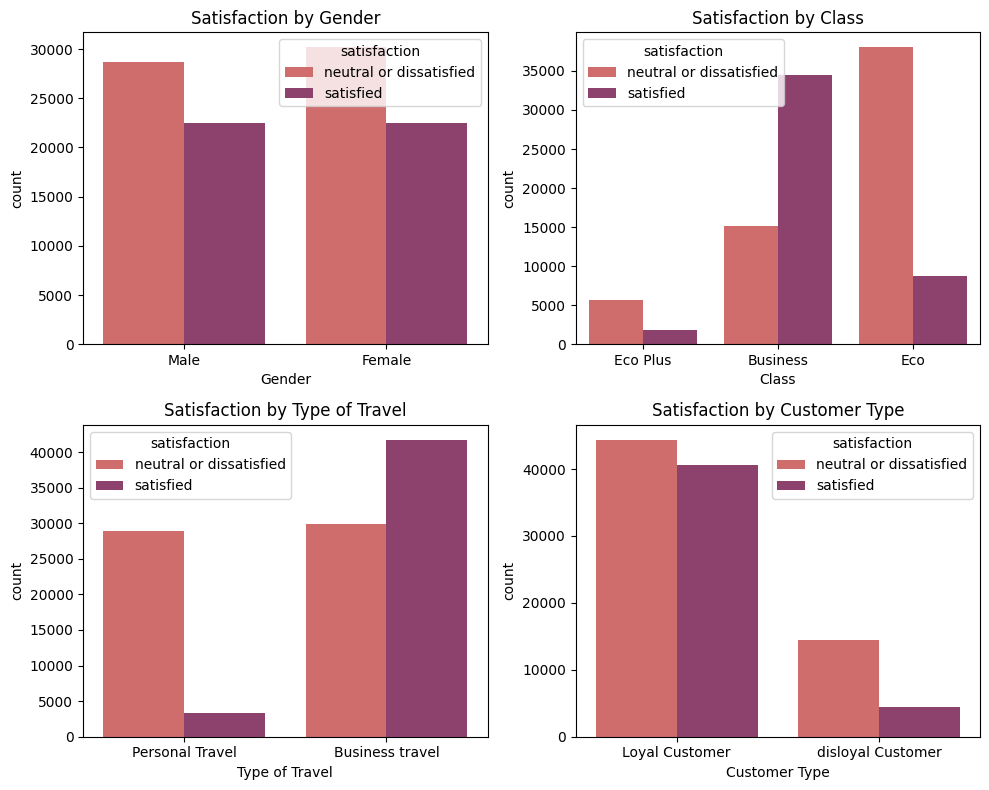

In [13]:
# Bar chart of Categorical Variables vs Satisfaction
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2, 2, figsize=(10,8))

sns.countplot(x='Gender', hue='satisfaction', palette='flare', data=train, ax=ax[0, 0])
ax[0, 0].set_title('Satisfaction by Gender')

sns.countplot(x='Class', hue='satisfaction', palette='flare', data=train, ax=ax[0, 1])
ax[0, 1].set_title('Satisfaction by Class')

sns.countplot(x='Type of Travel', hue='satisfaction', palette='flare', data=train, ax=ax[1, 0])
ax[1, 0].set_title('Satisfaction by Type of Travel')

sns.countplot(x='Customer Type', hue='satisfaction', palette='flare', data=train, ax=ax[1, 1])
ax[1, 1].set_title('Satisfaction by Customer Type')

plt.tight_layout()
plt.show()

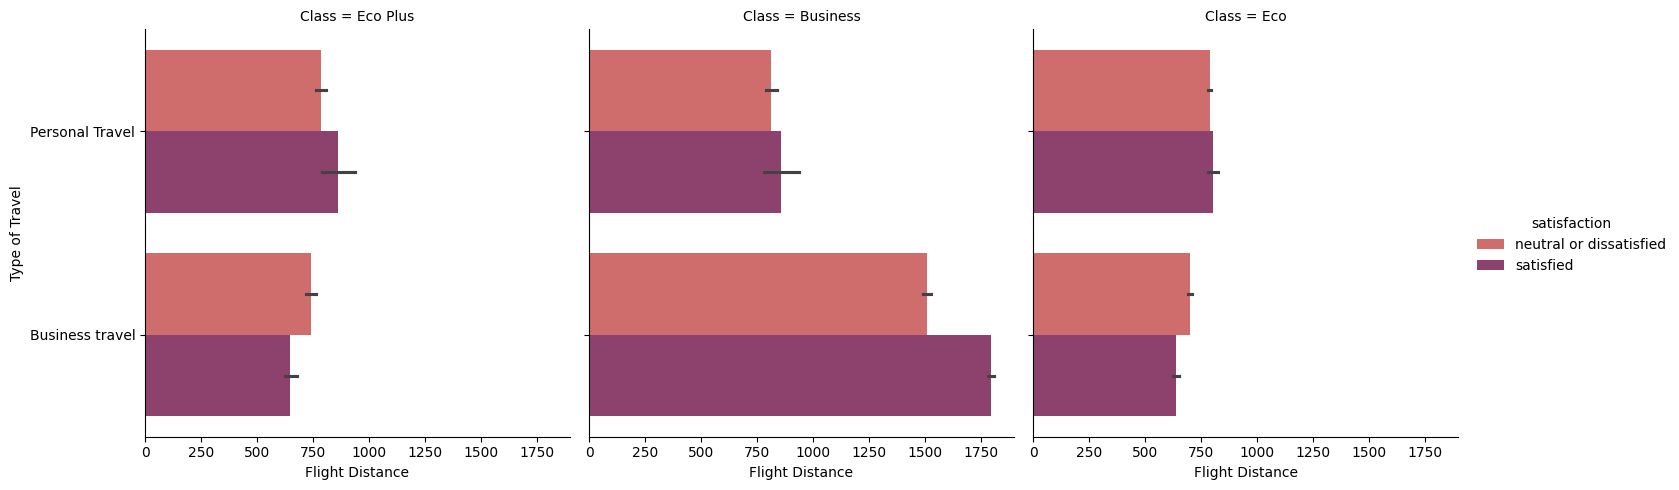

In [14]:
# Bar chart of Class,Type of Travel,Flight Distance
import matplotlib.pyplot as plt
import seaborn as sns

sns.catplot(x = "Flight Distance", y = "Type of Travel", col = "Class", hue = "satisfaction", data = train, kind = "bar", palette = "flare")

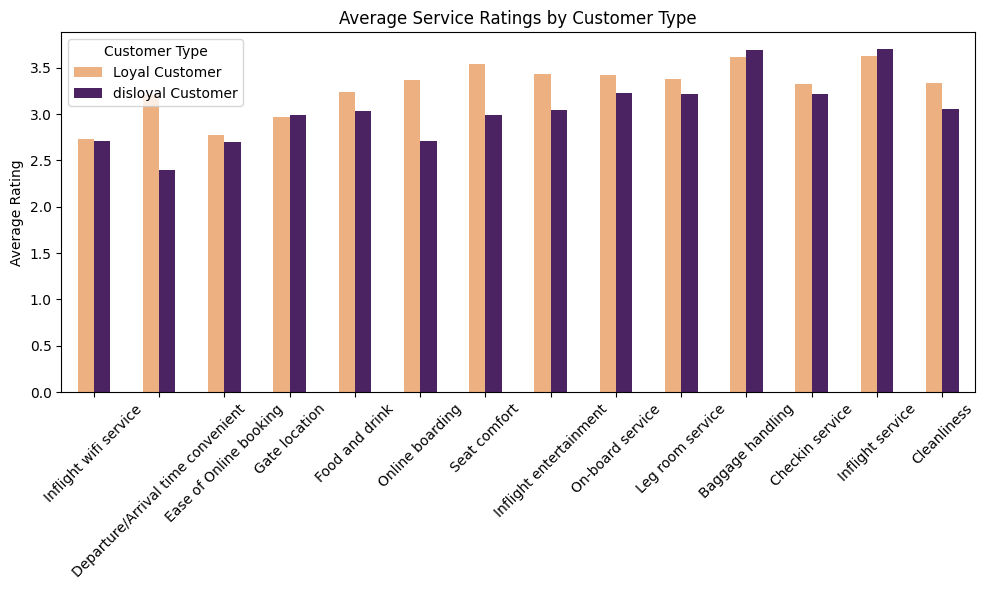

In [15]:
# Bar chart for average rating by customer type 
service_features = ['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']

avg_ratings = train.groupby(['Customer Type'])[
    service_features].mean().T

avg_ratings.plot(kind='bar', figsize=(10,6), colormap='flare')
plt.title("Average Service Ratings by Customer Type")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

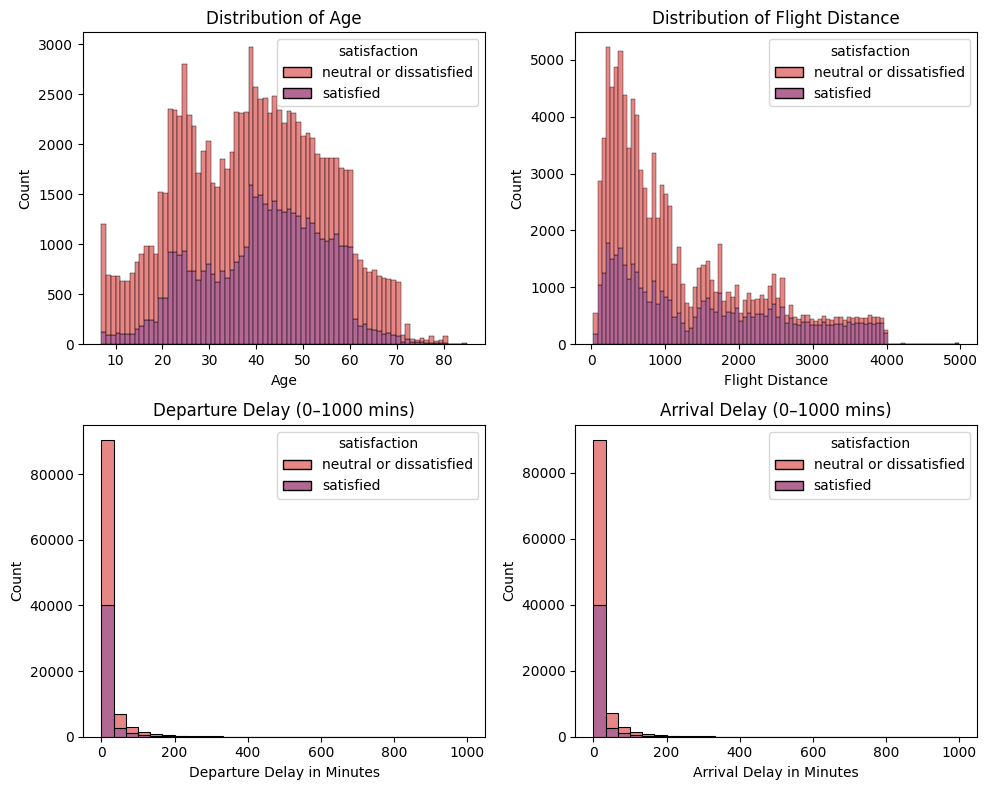

In [16]:
# Histogram to visualization the distribution of numerical variables
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2, 2, figsize=(10,8))

sns.histplot(x='Age', hue='satisfaction', multiple='stack', palette='flare', data=train, ax=ax[0, 0])
ax[0, 0].set_title('Distribution of Age')

sns.histplot(x='Flight Distance', hue='satisfaction', multiple='stack', palette='flare', data=train, ax=ax[0, 1])
ax[0, 1].set_title('Distribution of Flight Distance')

sns.histplot(x='Departure Delay in Minutes', hue='satisfaction', palette='flare', data=train, multiple='stack', binrange=(0, 1000), bins=30, ax=ax[1, 0])
ax[1, 0].set_title('Departure Delay (0–1000 mins)')

sns.histplot(x='Arrival Delay in Minutes', hue='satisfaction', palette='flare', data=train, multiple='stack', binrange=(0, 1000), bins=30, ax=ax[1, 1])
ax[1, 1].set_title('Arrival Delay (0–1000 mins)')

plt.tight_layout()
plt.show()

<Axes: xlabel='Arrival Delay in Minutes', ylabel='Departure Delay in Minutes'>

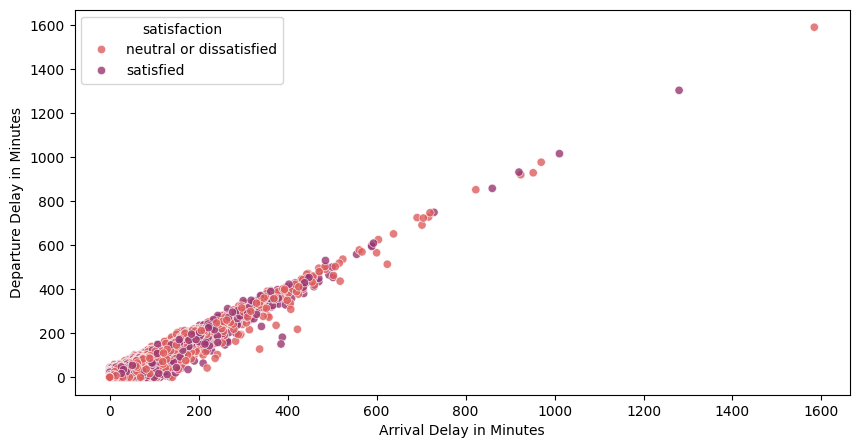

In [12]:
# Scatter plot for Departure Delay and Arrival Delay (in minutes) vs Satisfaction
plt.figure(figsize=(10,5), dpi=100)
sns.scatterplot(data=train,x='Arrival Delay in Minutes',y='Departure Delay in Minutes',hue='satisfaction',palette='flare', alpha=0.8)

## Data Cleaning and Preperation for Machine Learning

### **Data Cleaning:**

Handling Missing Values:
- The feature Departure Delay in Minutes contains some missing values. Since this is a numerical variable that may be skewed, I chose to fill missing values using the median, which is more robust to outliers than the mean.

Handling Outliers:
- I applied winsorization to key numerical features to limit extreme values by capping them at the 1st and 99th percentiles.

### **Feature Rescaling:**

Normalization: 
- I will choose StandardScaler() to rescale all numerical features, transforming them to have zero mean and unit variance.

### **Categorical Feature Encoding:**

I will use OneHotEncoder() for nominal categorical features such as:
- Gender
- Customer Type
- Type of Travel
- Class
- Seat comfort level

### **Visualization before and after scaling**

I will visualize numerical features before and after winsorization using boxplots and histograms.

I will also plot distributions before and after standardization to verify that features are centered and scaled properly.